# Librería textblob para análisis de sentimientos en python

## Librerías a usar

In [1]:
pip install textblob

In [2]:
pip install googletrans==4.0.0rc1

In [37]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from googletrans import Translator

## Lectura de datos

In [13]:
Opiniones = open("OpinionesPocoX3.txt")
Opiniones_arr = Opiniones.read().splitlines()
Opiniones.close()

In [38]:
# Arreglo de comentarios con número para el plot final
Nro_Comentarios = []
for i in range(len(Opiniones_arr)):
  Nro_Comentarios.append("Com"+str(i+1))

## Análisis de sentimientos

In [42]:
lista_de_popularidad=[]
traductor = Translator()
print("ANÁLISIS DE SENTIMIENTOS DE 10 OPINIONES SOBRE XIAOMI POCO X3")
for opinion in Opiniones_arr:
  print("====================================================")
  print(opinion)
  opinion_tr = traductor.translate(opinion, dest="en")
  nueva_op = opinion_tr.text
  analisis = TextBlob(nueva_op)
  analisis = analisis.sentiment
  print(analisis)
  if (float(analisis[0])>=-1 and float(analisis[0])<-0.3 and float(analisis[1])>=0.5):
    print("Negativo y subjetivo")
  elif (float(analisis[0])>=-1 and float(analisis[0])<-0.3 and float(analisis[1])<0.5):
    print("Negativo y objetivo")
  elif (float(analisis[0])>=-0.3 and float(analisis[0])<0.3 and float(analisis[1])>=0.5):
    print("Neutro y subjetivo")
  elif (float(analisis[0])>=-0.3 and float(analisis[0])<0.3 and float(analisis[1])<0.5):
    print("Neutro y objetivo")
  elif (float(analisis[0])>=0.3 and float(analisis[0])<=1 and float(analisis[1])>=0.5):
    print("Positivo y subjetivo")
  elif (float(analisis[0])>=0.3 and float(analisis[0])<=1 and float(analisis[1])<0.5):
    print("Positivo y objetivo")
  popularidad = analisis.polarity
  lista_de_popularidad.append(popularidad)

ANÁLISIS DE SENTIMIENTOS DE 10 OPINIONES SOBRE XIAOMI POCO X3
Poco x3 pro. Hermoso celular. Y espero me dure por muchos años.
Sentiment(polarity=0.15625, subjectivity=0.5)
Neutro y subjetivo
Es bastante rápido en todas sus funciones. Lo que no me gusta es que se drena la batería sin usar, 5 por ciento cada 12 horas. Ojalá lo arreglen con una próxima actualización.
Sentiment(polarity=0.1, subjectivity=0.3)
Neutro y objetivo
Es un excelente equipo, tiene muchísimas puntos a favor, sobretodo la velocidad para ejecutar aplicaciones, en cuanto a los juegos debería haberme ido mejor sin embargo al menos para un juego que de llama dota underlords, demora un poquito más de lo que hubiera esperado y eso que esta es la versión de 8gbs de ram, otro punto en contra es la gran cantidad de publicidad que tiene en sus juegos que están instalados por defecto que por cierto algunas veces tienen bugs, como no reconocer las teclas, otro punto en contra es que en teoría la batería debería ser bastante dur

## Gráfica de análisis de sentimientos

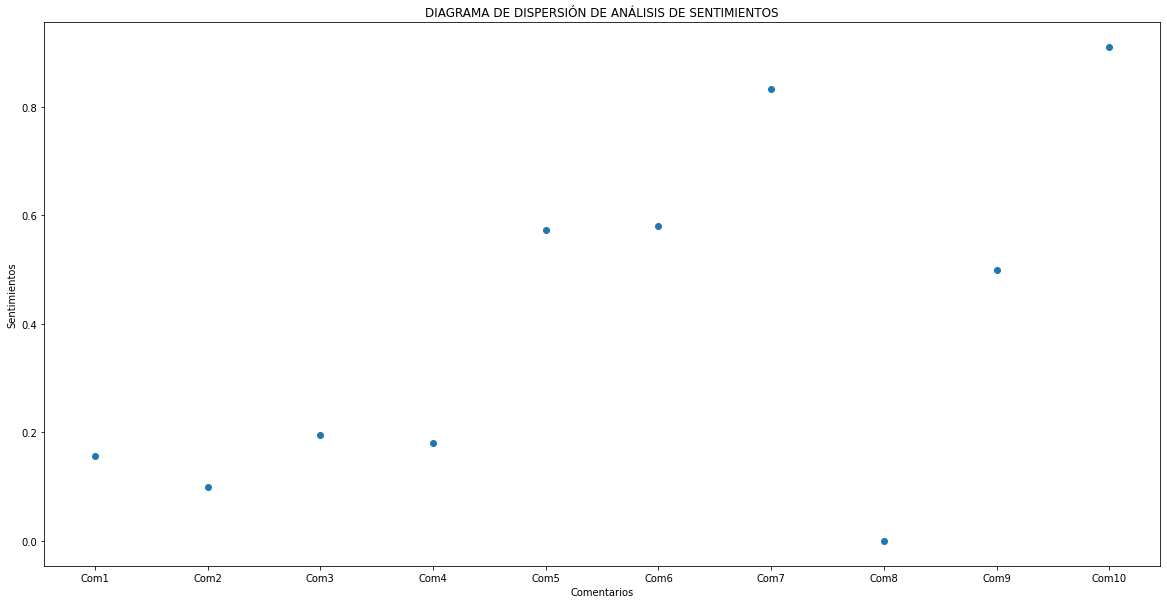

In [44]:
plt.figure(figsize=(20,10))
plt.scatter(Nro_Comentarios,lista_de_popularidad)
plt.title("DIAGRAMA DE DISPERSIÓN DE ANÁLISIS DE SENTIMIENTOS")
plt.xlabel("Comentarios")
plt.ylabel("Sentimientos")
plt.show()